In [2]:
# Import the dependencies : 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
# Load the dataset : 
df = pd.read_csv('dataset.csv')

In [6]:
# print first 3 rows of dataset 
df.head(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7


In [12]:
# It looks like this dataset does not have calories (target) column.
# Therefore, we have to merge the two datasets. 
target_data = pd.read_csv('calories.csv')
df = pd.merge(df,target_data, on='User_ID')

In [14]:
# Print first 3 rows of dataset 
df.head(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0


In [18]:
# ---------- Let's have a basic understanding of this dataset ------- 
print(f"Rows : {df.shape[0]}, Columns : {df.shape[1]}")
print(f"Column Names : {df.columns}")
print(df.info())
print(df.describe())
print(f"Number of Null values : {df.isnull().sum()}")
print(f"Number of Duplicates : {df.duplicated().sum()}")

Rows : 15000, Columns : 9
Column Names : Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB
None
            User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    17

In [26]:
# Encoding of Gender column : 
df = pd.get_dummies(data=df, columns=['Gender'], drop_first=True, dtype=int)

<Axes: xlabel='Gender_male', ylabel='count'>

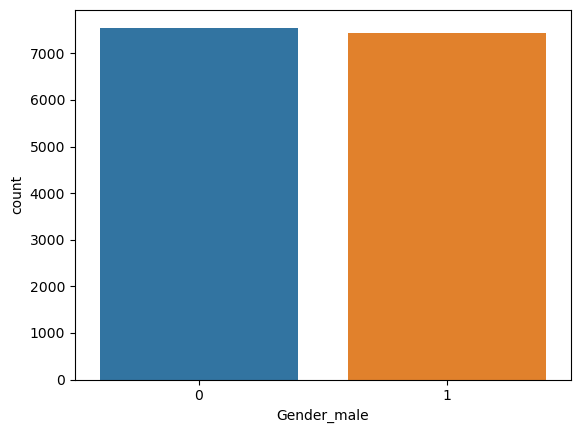

In [46]:
# Uni-variate Analysis : 
#['User_ID', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
#      'Body_Temp', 'Calories', 'Gender_male']

# 1. 'Gender_male' : 
sns.countplot(data=df, x='Gender_male')

In [48]:
df['Gender_male'].value_counts()

Gender_male
0    7553
1    7447
Name: count, dtype: int64

C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

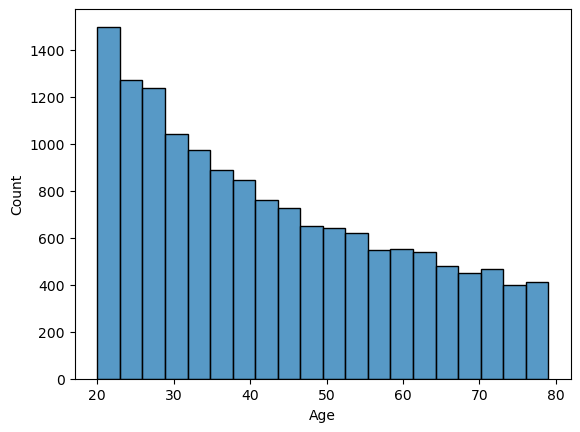

In [56]:
# 2 : 'Age' : 
sns.histplot(data=df, x='Age', bins=20)

In [64]:
# This feature is not giving much information. 
# Let's do feature construction from this. 
# Min age = 20 
# Max age = 79 
# Let's change age column to different age groups. 
# 20, 40 -> Young,  40, 60 -> Middle-aged,  senior-citizen - 60,80 
# Instead directly lets convert it to discrete values. 
# If age is in between 0-18 -> 0, 19-30 ->1, 30-50 -> 2, 50 - 100 -> 3 
age_groups = [0,1,2,3]
df['age_group'] = pd.cut(df['Age'], bins=[0,18,30,50,100], right=False, labels=age_groups)

C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='age_group', ylabel='count'>

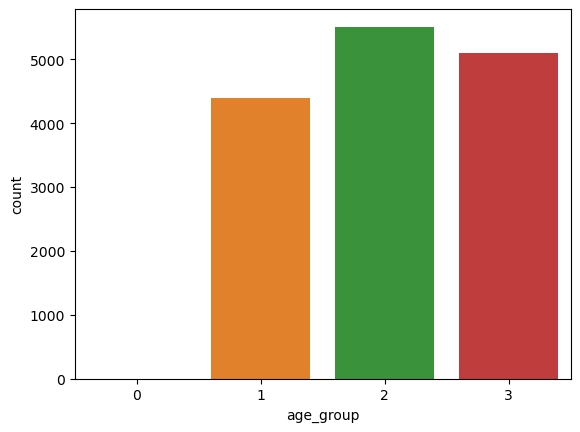

In [68]:
# Plot age group :
sns.countplot(data=df, x='age_group')

In [72]:
# Let us extract a new feature from 'Height', 'Weight' as they are highly correlated. 
df['bmi'] = round(df['Weight'] / ((df['Height']/100) **2),2)

In [74]:
df

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_male,age_group,bmi
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0,1,3,26.04
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0,0,1,21.77
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0,1,3,24.66
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0,0,2,22.16
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0,0,1,24.46
...,...,...,...,...,...,...,...,...,...,...,...
14995,15644082,20,193.0,86.0,11.0,92.0,40.4,45.0,0,1,23.09
14996,17212577,27,165.0,65.0,6.0,85.0,39.2,23.0,0,1,23.88
14997,17271188,43,159.0,58.0,16.0,90.0,40.1,75.0,0,2,22.94
14998,18643037,78,193.0,97.0,2.0,84.0,38.3,11.0,1,3,26.04


In [84]:
# Let's try to find some coorelations 
corr = df.corr()

<Axes: >

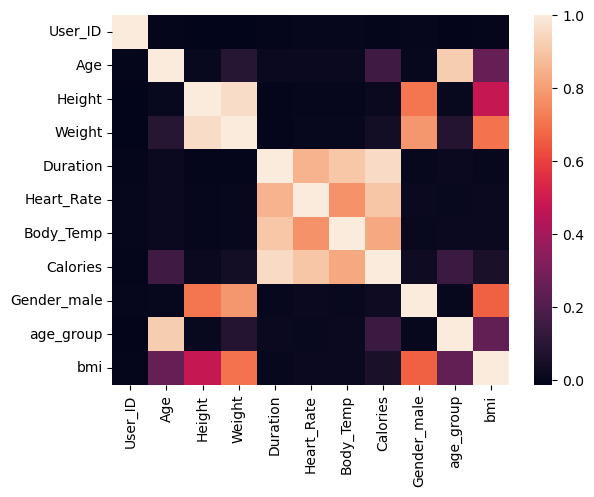

In [97]:
sns.heatmap(corr)

In [101]:
# Split in X and Y : 
X = df.drop(columns=['User_ID', 'Age','Height', 'Weight', 'Calories' ])
y = df['Calories']

In [103]:
X

,Duration,Heart_Rate,Body_Temp,Gender_male,age_group,bmi
0,29.0,105.0,40.8,1,3,26.04
1,14.0,94.0,40.3,0,1,21.77
2,5.0,88.0,38.7,1,3,24.66
3,13.0,100.0,40.5,0,2,22.16
4,10.0,81.0,39.8,0,1,24.46
...,...,...,...,...,...,...
14995,11.0,92.0,40.4,0,1,23.09
14996,6.0,85.0,39.2,0,1,23.88
14997,16.0,90.0,40.1,0,2,22.94
14998,2.0,84.0,38.3,1,3,26.04


In [107]:
# Train and testing data splitting : 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [109]:
# Training the model. 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(mae)
print(mse) 
print(r2)

8.661809075962157
143.56976334363753
0.9644258718147396


In [111]:
# Trying decision tree Algorithm : 
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(mae)
print(mse) 
print(r2)

4.920166666666667
59.44325
0.985270980838862


In [113]:
# Trying with Random Forest : 
from sklearn.ensemble import RandomForestRegressor
rf = DecisionTreeRegressor()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(mae)
print(mse) 
print(r2)

4.861833333333333
57.75475
0.9856893622169594
